# Effect of Degenerate Noise 

In this notebook we look at how the difference in noise strength effects the analytic solution for the 2D OU MAM model.

In [1]:
# Instanton Code Imports
import sys
sys.path.append('/rds/general/user/cfn18/home/Instantons/L96-EBM-Instanton')
    
from mam import Mam_alg
from instanton_utility import *
    
# Standard Package imports
import numpy as np
import numpy.linalg as la
import numpy.random as rm
from scipy.linalg import expm

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [7]:
# Defines solution

def expA(t, p):
    gamma1, gamma2, eps, r = p
    row1 = np.array([-gamma1, -gamma1, 1, 0])
    row2 = np.array([gamma2, -gamma2, 0, r**2])
    row3 = np.array([0, 0, gamma1, -gamma2])
    row4 = np.array([0, 0, gamma1, gamma2])
    A = np.vstack((row1, row2, row3, row4))
    return expm(A * t) 

In [54]:
# Fixed Parameters

# OU Parameters
gamma1 = 10
gamma2 = 1
eps = 0.01

# Time
t0 = 0
tF = 1 # If tF = 10, you get singular matrix
dt = 0.01
steps = int((tF-t0)/dt) + 1
time = np.arange(t0, tF + dt, dt)

# BC
initial_point = [0, 0]
final_point = [1, 2]

In [55]:
# Range of rs we look at
rs = [10**-k for k in range(5)]

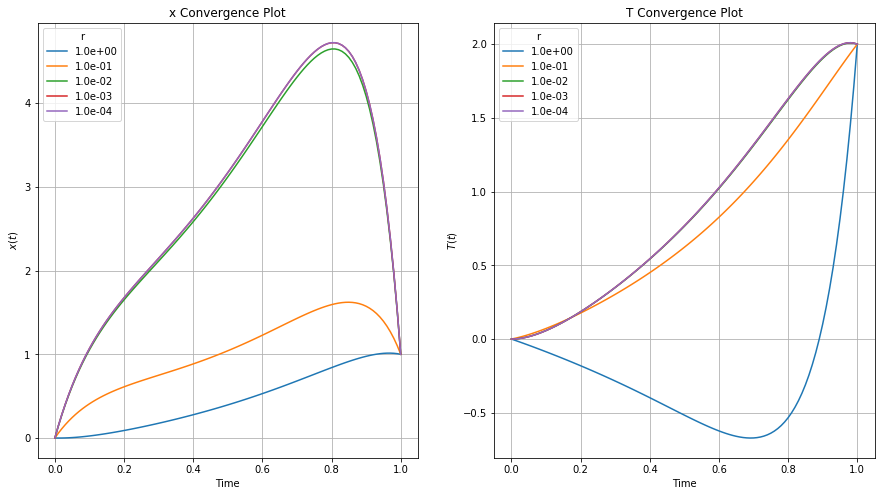

In [56]:
# Plotting Analytic Solution for different r

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

for r in tqdm(rs):
    
    s = [gamma1, gamma2, eps, r]
    a = np.vstack((expA(0, s)[:2], expA(tF, s)[:2]))
    b = np.hstack([initial_point, final_point]) # BCs
    c = la.solve(a, b)
    analytic_solution = np.vstack([np.matmul(expA(t, s), c) for t in time])
    axes[0].plot(time,  analytic_solution[:, 0], label=f'{r:.1e}')
    axes[1].plot(time,  analytic_solution[:, 1], label=f'{r:.1e}')


    
axes[0].legend(title = 'r')
axes[0].grid()
axes[0].set_title('x Convergence Plot')
axes[0].set_ylabel('$x(t)$')
axes[0].set_xlabel('Time')

axes[1].legend(title = 'r')
axes[1].grid()
axes[1].set_title('T Convergence Plot')
axes[1].set_ylabel('$T(t)$')
axes[1].set_xlabel('Time')

fig.show()